In [1]:
import numpy as np

In [2]:
l = np.random.random(100)
sum(l)

53.54194681486503

In [3]:
np.sum(l)

53.54194681486503

In [4]:
big_arr = np.random.random(1000000)
%timeit np.sum(big_arr)
%timeit sum(big_arr)

406 µs ± 4.18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
142 ms ± 3.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)




Be careful, though: the sum function and the np.sum function are not identical, which can sometimes lead to confusion! In particular, their optional arguments have different meanings, and np.sum is aware of multiple array dimensions, as we will see in the following section.


In [5]:
min(big_arr) , max(big_arr)

(1.1673607400730646e-06, 0.9999992023924991)

In [8]:
np.min(big_arr) , np.max(big_arr)

(1.1673607400730646e-06, 0.9999992023924991)

In [9]:
%timeit min(big_arr)
%timeit np.min(big_arr)

89.3 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
514 µs ± 6.48 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
print(big_arr.sum() , big_arr.min() , big_arr.max())

499642.5529141412 1.1673607400730646e-06 0.9999992023924991


In [11]:
m = np.random.random((3 , 4))

In [12]:
m

array([[0.87896543, 0.51758549, 0.77596859, 0.28846517],
       [0.06770182, 0.55578119, 0.43382263, 0.76521604],
       [0.57672988, 0.8655369 , 0.59387077, 0.86739205]])

In [13]:
m.sum()

7.187035963644915

In [14]:
m.min(axis=0)

array([0.06770182, 0.51758549, 0.43382263, 0.28846517])

In [15]:
m.min(axis=1)

array([0.28846517, 0.06770182, 0.57672988])

In [17]:

l.mean()

0.5354194681486503

In [18]:
l.std()

0.24811594447863689

In [20]:
np.median(l)

0.5425115211286713

In [21]:
l

array([0.37190082, 0.77367648, 0.60399393, 0.62468387, 0.79039855,
       0.53004709, 0.95876007, 0.78810948, 0.64420143, 0.5865615 ,
       0.07574113, 0.98604762, 0.80329219, 0.95470528, 0.63635391,
       0.89746949, 0.85151949, 0.99140988, 0.42145376, 0.62292167,
       0.32408471, 0.12744468, 0.5593232 , 0.38711534, 0.35782195,
       0.34973011, 0.13991931, 0.50792247, 0.44251038, 0.86780844,
       0.38558816, 0.20128434, 0.77129906, 0.29514449, 0.20780223,
       0.5130846 , 0.64111018, 0.63107184, 0.26558637, 0.81352713,
       0.9174145 , 0.93025476, 0.89571916, 0.61622134, 0.72856045,
       0.64896437, 0.44313783, 0.32856204, 0.3984413 , 0.58099151,
       0.42871568, 0.2343676 , 0.72572876, 0.54616199, 0.60758859,
       0.36321544, 0.67886701, 0.93108851, 0.33427137, 0.77028622,
       0.22091149, 0.49619687, 0.14297943, 0.58633318, 0.18815238,
       0.30939569, 0.89067811, 0.41830203, 0.04443499, 0.47679918,
       0.45692964, 0.20843308, 0.74792789, 0.79294556, 0.57662

In [23]:
np.percentile(l , 100)

0.9914098751737496

In [24]:
print("75th percentile:   ", np.percentile(l, 75))

75th percentile:    0.7264366851180319


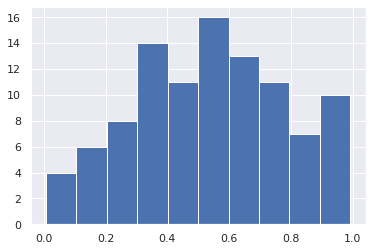

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn 
seaborn.set() #for styling
plt.hist(l)
plt.show()

# Broadcasting

Broadcasting is simply a set of rules for applying binary ufuncs (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes.

In [29]:
import numpy as np

In [30]:
a  = np.array([4 , 5 , 6])
b = np.array([4 , 78 , 8])
a+b

array([ 8, 83, 14])

In [31]:
a+5

array([ 9, 10, 11])

The advantage of NumPy's broadcasting is that this duplication of values does not actually take place, but it is a useful mental model as we think about broadcasting.

In [33]:
m = np.ones((3 , 3))

In [34]:
m+a

array([[5., 6., 7.],
       [5., 6., 7.],
       [5., 6., 7.]])

In [35]:
a = np.arange(3)
b = np.arange(3)[: , np.newaxis]

In [37]:
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

# Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

    Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
    Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
    Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.


In [38]:


M = np.ones((2, 3))
a = np.arange(3)





Let's consider an operation on these two arrays. The shape of the arrays are

    M.shape = (2, 3)
    a.shape = (3,)

We see by rule 1 that the array a has fewer dimensions, so we pad it on the left with ones:

    M.shape -> (2, 3)
    a.shape -> (1, 3)

By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:

    M.shape -> (2, 3)
    a.shape -> (2, 3)


In [39]:
M+a

array([[1., 2., 3.],
       [1., 2., 3.]])

In [40]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)



Again, we'll start by writing out the shape of the arrays:

    a.shape = (3, 1)
    b.shape = (3,)

Rule 1 says we must pad the shape of b with ones:

    a.shape -> (3, 1)
    b.shape -> (1, 3)

And rule 2 tells us that we upgrade each of these ones to match the corresponding size of the other array:

    a.shape -> (3, 3)
    b.shape -> (3, 3)


In [41]:
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [42]:
M = np.ones((3, 2))
a = np.arange(3)



This is just a slightly different situation than in the first example: the matrix M is transposed. How does this affect the calculation? The shape of the arrays are

    M.shape = (3, 2)
    a.shape = (3,)

Again, rule 1 tells us that we must pad the shape of a with ones:

    M.shape -> (3, 2)
    a.shape -> (1, 3)

By rule 2, the first dimension of a is stretched to match that of M:

    M.shape -> (3, 2)
    a.shape -> (3, 3)

Now we hit rule 3–the final shapes do not match, so these two arrays are incompatible, as we can observe by attempting this operation:


In [43]:
M+a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [45]:
M+a[: , np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])



Also note that while we've been focusing on the + operator here, these broadcasting rules apply to any binary ufunc. For example, here is the logaddexp(a, b) function, which computes log(exp(a) + exp(b)) with more precision than the naive approach:


In [46]:
np.logaddexp(M , a[: , np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

In [47]:
np.linspace(0, 5, 50)

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

# Comparisons, Masks, and Boolean Logic



This section covers the use of Boolean masks to examine and manipulate values within NumPy arrays. Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion: for example, you might wish to count all values greater than a certain value, or perhaps remove all outliers that are above some threshold. In NumPy, Boolean masking is often the most efficient way to accomplish these types of tasks.


In [3]:
x = np.array([1 , 5 , 6 , 8 , 9])


In [4]:
x < 3

array([ True, False, False, False, False])

In [5]:
x > 5

array([False, False,  True,  True,  True])

In [6]:
x <= 3

array([ True, False, False, False, False])

In [7]:
x >= 5

array([False,  True,  True,  True,  True])

In [8]:
x != 5

array([ True, False,  True,  True,  True])

In [9]:
x == 5

array([False,  True, False, False, False])

In [10]:
(2 * x) == (x ** 2)

array([False, False, False, False, False])

In [11]:
rng = np.random.RandomState(0)
rng

RandomState(MT19937) at 0x7F193A2D1490

In [12]:
x = rng.randint(10 , size = (3 , 4))

In [13]:
x 

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [14]:
x >3

array([[ True, False, False, False],
       [ True,  True, False,  True],
       [False,  True,  True,  True]])

In [15]:
#how many values less than six
np.count_nonzero(x < 6)

8

In [16]:
np.sum(x < 6 ) #same np.count_nonzero(x < 6)

8

In [17]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [18]:
np.any(x > 8)

True

In [21]:
np.all(x < 10)

True

In [23]:
np.all( x< 7 , axis=1)

array([ True, False, False])

In [27]:
np.sum((x > 5) & (x < 10))

4

In [28]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [31]:
#or
np.sum(~( (x <= 5) | (x >= 10) ))

4

In [2]:
bool(42)

True

In [3]:
bin(42)

'0b101010'

In [6]:
bin(8 & 24)

'0b1000'

In [5]:
bin(130)

'0b10000010'

In [7]:


x = np.arange(10)
(x > 4) & (x < 8)



array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [8]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [9]:


A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B



array([ True,  True,  True, False,  True,  True])